# Models

# Table of contents:
* 1 [Preparation](#intro-bullet)
* 2 [Logistic Regression](#first-bullet)
* 3 [Random Forest](#second-bullet)
* 4 [Naive Bayes](#third-bullet)
* 5 [LigthGBM](#fourth-bullet)
    * 5.1 [Plain LigthGBM](#fifth-bullet)
    * 5.2 [LightGBM with LR](#sixth-bullet)
    * 5.3 [LigthGBM with RF](#seventh-bullet)
    * 5.4 [LigthGBM with NB](#eigth-bullet)
* 6 [XGBM](#nineth-bullet)
    * 6.1 [Plain XGBM](#tenth-bullet)
    * 6.2 [XGBM with LR](#eleventh-bullet)
    * 6.3 [XGBM with RF](#12-bullet)
    * 6.4 [XGBM with NB](#13-bullet)

## 1. Preparation <a class="anchor" id="intro-bullet"></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [57]:
tmp_data = pd.read_csv("./featureData.csv")
# split into train test sets
train_data, test_data = train_test_split(tmp_data,test_size=0.2)

test_data.reset_index(inplace = True, drop = True)
train_data.reset_index(inplace = True, drop = True)


In [58]:
test_data=test_data.drop(columns='Unnamed: 0')
train_data=train_data.drop(columns='Unnamed: 0')

In [59]:
test_data
    

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,AMT_GOODS_PRICE_norm,DAYS_BIRTH_norm,DAYS_EMPLOYED_norm,DAYS_REGISTRATION_norm,DAYS_ID_PUBLISH_norm,OWN_CAR_AGE_norm,HOUR_APPR_PROCESS_START_norm,AMT_CREDIT_log_norm,AMT_ANNUITY_log_norm,AMT_GOODS_PRICE_log_norm
0,177144,0,0,0,0,463500.0,18508.5,463500.0,0.015221,14680,...,0.105499,0.405355,0.165252,0.197147,0.633042,0.098901,0.521739,0.518274,0.480607,0.529295
1,306136,0,0,0,0,167895.0,16483.5,157500.0,0.020713,17992,...,0.029181,0.592052,0.618859,0.441675,0.213700,0.098901,0.478261,0.292605,0.457766,0.294910
2,223103,0,0,1,0,485190.0,23472.0,405000.0,0.018801,14193,...,0.090909,0.377903,0.319506,0.033601,0.640406,0.296703,0.347826,0.528438,0.527438,0.499998
3,378232,0,0,1,0,292500.0,14355.0,292500.0,0.028663,9915,...,0.062851,0.136753,0.032101,0.037168,0.360984,0.131868,0.608696,0.415971,0.430513,0.429333
4,418656,0,0,0,0,604152.0,29196.0,540000.0,0.046220,10793,...,0.124579,0.186246,0.015967,0.023752,0.252605,0.098901,0.608696,0.577170,0.570455,0.562467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,174645,0,0,0,0,225000.0,16596.0,225000.0,0.026392,20835,...,0.046016,0.752311,0.132704,0.417599,0.577880,0.098901,0.739130,0.357666,0.459107,0.372361
61499,295318,0,0,0,0,408330.0,20979.0,292500.0,0.010147,12089,...,0.062851,0.259301,0.123604,0.082725,0.398499,0.098901,0.391304,0.490111,0.505304,0.429333
61500,280924,0,0,0,1,1350000.0,39604.5,1350000.0,0.028663,11914,...,0.326599,0.249436,0.029645,0.160263,0.550368,0.098901,0.304348,0.755853,0.630560,0.761438
61501,214690,0,0,0,2,1061599.5,31041.0,927000.0,0.009657,10019,...,0.221100,0.142616,0.011277,0.015686,0.370988,0.098901,0.565217,0.702444,0.582534,0.679811


## 2. Logistic Regression <a class="anchor" id="first-bullet"></a>

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
def LogRegModel(train, test):
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    # Make the model with the specified regularization parameter
    log_reg = LogisticRegression(C = 0.0001, class_weight=dict)
    # Train on the training data
    log_reg.fit(train, labels)
    # Select only second column(TARGET)
    log_reg_pred = log_reg.predict_proba(test)[:, 1]
    tescik = log_reg.predict(test)
    f1 = f1_score(test_labels, tescik)
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, log_reg_pred))
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, log_reg_pred)

In [61]:
LogRegScore = LogRegModel(train_data,test_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train/Test split results:
ROC 0.6253816156491754
F1 score: 0.000000


## 3. Random Forest <a class="anchor" id="second-bullet"></a>

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def RanForModel(train,test):
    rf = RandomForestClassifier(n_estimators=100,
                                max_depth=10,min_samples_split=20,
                                min_samples_leaf=6,
                                max_features='auto')
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    
    rf.fit(X = train, y = labels)
    # Select only second column(TARGET)
    ran_for_pred = rf.predict_proba(test)[:, 1]
    
    tescik = rf.predict(test)
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, ran_for_pred))
    return roc_auc_score(test_labels, ran_for_pred)
   


In [63]:
RandForScore = RanForModel(train_data,test_data)

F1 score: 0.000000
Train/Test split results:
ROC 0.736639010430749


In [64]:
# import sys
# !{sys.executable} -m pip install imblearn

In [65]:
from imblearn.ensemble import BalancedRandomForestClassifier

def imbalancedRanFor(train,test):
    rf = BalancedRandomForestClassifier()
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    
    rf.fit(X = train, y = labels)
    # Select only second column(TARGET)
    ran_for_pred = rf.predict_proba(test)[:, 1]
    
    tescik = rf.predict(test)
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, ran_for_pred))
    return roc_auc_score(test_labels, ran_for_pred)

In [66]:
imbRanFor =imbalancedRanFor(train_data,test_data)

F1 score: 0.256361
Train/Test split results:
ROC 0.7383087691968435


## 4. Naive Bayesn <a class="anchor" id="third-bullet"></a>

In [67]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score

def NaiveBayModel(train,test):
    
    
    clf = BernoulliNB()
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
#     train = train[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","NAME_INCOME_TYPE_Working",
#                   "DAYS_LAST_PHONE_CHANGE","CODE_GENDER_M","NAME_EDUCATION_TYPE_Secondary / secondary special",
#                   "REG_CITY_NOT_WORK_CITY","FLAG_EMP_PHONE","REG_CITY_NOT_LIVE_CITY","EXT_SOURCE_2",
#                   "EXT_SOURCE_3","EXT_SOURCE_1","DAYS_BIRTH","DAYS_EMPLOYED",
#                   "NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","DAYS_ID_PUBLISH",
#                   "NAME_INCOME_TYPE_Pensioner","ORGANIZATION_TYPE_XNA"]]
#     test = test[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","NAME_INCOME_TYPE_Working",
#                   "DAYS_LAST_PHONE_CHANGE","CODE_GENDER_M","NAME_EDUCATION_TYPE_Secondary / secondary special",
#                   "REG_CITY_NOT_WORK_CITY","FLAG_EMP_PHONE","REG_CITY_NOT_LIVE_CITY","EXT_SOURCE_2",
#                   "EXT_SOURCE_3","EXT_SOURCE_1","DAYS_BIRTH","DAYS_EMPLOYED",
#                   "NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","DAYS_ID_PUBLISH",
#                   "NAME_INCOME_TYPE_Pensioner","ORGANIZATION_TYPE_XNA"]]
    clf.fit(X = train, y = labels)
    clf_pred = clf.predict_proba(test)[:, 1]
    tescik = clf.predict(test)
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)

    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, clf_pred))
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, clf_pred)
  


In [68]:
NaiveScore = NaiveBayModel(train_data,test_data)

F1 score: 0.152971
Train/Test split results:
ROC 0.6261607516294776
F1 score: 0.152971


## 5. LigthGBM <a class="anchor" id="fourth-bullet"></a>

## 5.1 Plain LightGBM <a class="anchor" id="fifth-bullet"></a>

## 5.2 LightGBM with LR <a class="anchor" id="sixth-bullet"></a>

In [69]:
import lightgbm as lgb
import re
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
def PlainLightGBM(train,test):
    
    
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
   
    model = lgb.LGBMClassifier()
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
#     train = train[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","NAME_INCOME_TYPE_Working",
#                   "DAYS_LAST_PHONE_CHANGE","CODE_GENDER_M","NAME_EDUCATION_TYPE_Secondary / secondary special",
#                   "REG_CITY_NOT_WORK_CITY","FLAG_EMP_PHONE","REG_CITY_NOT_LIVE_CITY","EXT_SOURCE_2",
#                   "EXT_SOURCE_3","EXT_SOURCE_1","DAYS_BIRTH","DAYS_EMPLOYED",
#                   "NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","DAYS_ID_PUBLISH",
#                   "NAME_INCOME_TYPE_Pensioner","ORGANIZATION_TYPE_XNA"]]
#     test = test[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","NAME_INCOME_TYPE_Working",
#                   "DAYS_LAST_PHONE_CHANGE","CODE_GENDER_M","NAME_EDUCATION_TYPE_Secondary / secondary special",
#                   "REG_CITY_NOT_WORK_CITY","FLAG_EMP_PHONE","REG_CITY_NOT_LIVE_CITY","EXT_SOURCE_2",
#                   "EXT_SOURCE_3","EXT_SOURCE_1","DAYS_BIRTH","DAYS_EMPLOYED",
#                   "NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","DAYS_ID_PUBLISH",
#                   "NAME_INCOME_TYPE_Pensioner","ORGANIZATION_TYPE_XNA"]]
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    n_scores = cross_val_score(model, train, labels, scoring='roc_auc_ovo_weighted', cv=cv, n_jobs=-1, error_score='raise')
    
    model.fit(train, labels)
    model_pred = model.predict_proba(test)[:, 1]
   
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
     
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    return roc_auc_score(test_labels, model_pred)

    


Train/Test split results:
ROC 0.7644163583522577
F1 score: 0.040250


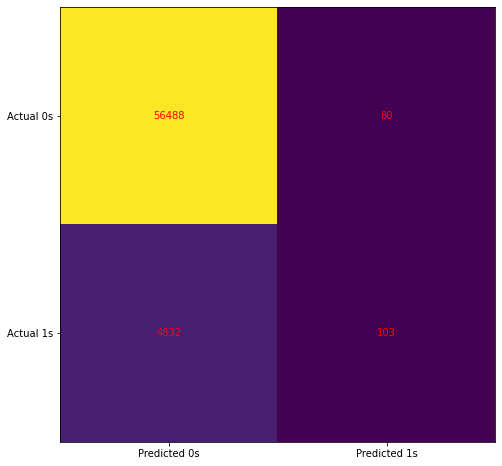

0.7644163583522577

In [70]:
# plainLGBMScore=PlainLightGBM(train_data,test_data)
PlainLightGBM(train_data,test_data)

In [ ]:
test_data.shape


## 5.3 LightGBM with RF <a class="anchor" id="seventh-bullet"></a>

In [51]:

from sklearn.neural_network import MLPClassifier
def multiplePer(train, test):
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    
    clf = MLPClassifier(random_state=1, max_iter=300)
    clf.fit(train, labels)
    model_pred = clf.predict_proba(test)[:, 1]
   
    tescik = clf.predict(test)
    f1 = f1_score(test_labels, tescik)
     
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

Train/Test split results:
ROC 0.500114924238406
F1 score: 0.000000


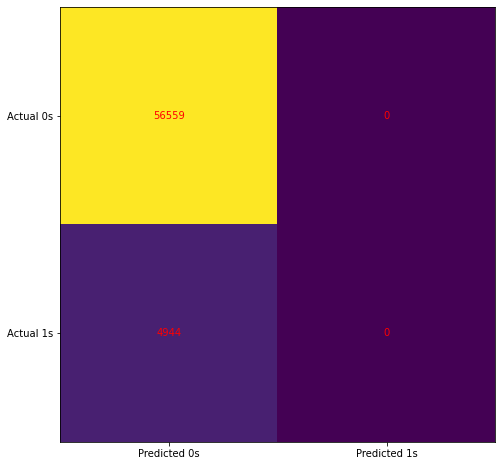

In [52]:
multiplePer(train_data, test_data)

## 5.4 LightGBM with NB <a class="anchor" id="eigth-bullet"></a>

## 6. XGBM <a class="anchor" id="nineth-bullet"></a>


## 6.1 Plain XGBM -- to long do not use <a class="anchor" id="tenth-bullet"></a>

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# import re

# def PlainXGBM(train,test):
    
#     model = XGBClassifier()
#      # Extract the ids
#     train_ids = train['SK_ID_CURR']
#     test_ids = test['SK_ID_CURR']
    
#     # Extract the labels for training
#     labels = train['TARGET']
#     test_labels = test['TARGET']
#     # Remove the ids and target
#     train = train.drop(columns = ['TARGET','SK_ID_CURR'])
#     test= test.drop(columns = ['TARGET','SK_ID_CURR'])
#     train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
#     model.fit(X = train, y = labels)
#     model_pred = model.predict_proba(test)[:, 1]
    
    
    
#     print('Train/Test split results:')
#     print("ROC",  roc_auc_score(test_labels, model_pred))




In [ ]:
# PlainXGBM(train_data,test_data)

## 6.2 XGBM with LR<a class="anchor" id="eleventh-bullet"></a>

## 6.3 XGBM with RF <a class="anchor" id="12-bullet"></a>

In [ ]:
train

## 6.4 XGBM with NB <a class="anchor" id="13-bullet"></a>

## Not completed -- do not use it 


In [ ]:
# def random_search(param_grid, max_evals = 5):
#     """Random search for hyperparameter optimization"""
    
#     # Dataframe for results
#     results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
#                                   index = list(range(5)))
    
#     # Keep searching until reach max evaluations
#     for i in range(5):
        
#         # Choose random hyperparameters
#         hyperparameters = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}
#         hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']

#         # Evaluate randomly selected hyperparameters
#         eval_results = objective(hyperparameters, i)
        
#         results.loc[i, :] = eval_results
    
#     # Sort with best score on top
#     results.sort_values('score', ascending = False, inplace = True)
#     results.reset_index(inplace = True)
#     return results

In [ ]:
# def newModel(train,test):
#     # Extract the test ids and train labels
#     test_ids = test['SK_ID_CURR']
#     train_labels = np.array(train['TARGET'].astype(np.int32)).reshape((-1, ))

#     train = train.drop(columns = ['SK_ID_CURR', 'TARGET'])
#     test = test.drop(columns = ['SK_ID_CURR'])

#     print('Training shape: ', train.shape)
#     print('Testing shape: ', test.shape)
#     train_set = lgb.Dataset(train, label = train_labels)
#     random_results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
#                               index = list(range(5)))
#     random_search_params = random_results.loc[0, 'params']
    
#     hyperparameters = dict(**random_results.loc[0, 'hyperparameters'])
#     del hyperparameters['n_estimators']

#     # Cross validation with n_folds and early stopping
#     cv_results = lgb.cv(hyperparameters, train_set,
#                     num_boost_round = 10000, early_stopping_rounds = 100, 
#                     metrics = 'auc', nfold = N_FOLDS)
    
#     print('The cross validation score on the full dataset = {:.5f} with std: {:.5f}.'.format(
#     cv_results['auc-mean'][-1], cv_results['auc-stdv'][-1]))
#     print('Number of estimators = {}.'.format(len(cv_results['auc-mean'])))
#     # Train the model with the optimal number of estimators from early stopping
#     model = lgb.LGBMClassifier(n_estimators = len(cv_results['auc-mean']), **hyperparameters)
#     model.fit(train, train_labels)
                        
#     # Predictions on the test data
#     preds = model.predict_proba(test)[:, 1]
#     submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': preds})
#     submission.to_csv('submission_simple_features_random.csv', index = False)


In [ ]:
# newModel(train_data,test_data)

## Not complete part 2


In [ ]:
# # compare ensemble to each baseline classifier
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import StackingClassifier
# from matplotlib import pyplot
 
# def get_stacking():
#     # define the base models
#     level0 = list()
#     level0.append(('lr', LogisticRegression()))
#     level0.append(('knn', KNeighborsClassifier()))
#     level0.append(('cart', DecisionTreeClassifier()))
#     level0.append(('svm', SVC()))
#     # define meta learner model
#     level1 = lgb.LGBMClassifier()
#     # define the stacking ensemble
#     model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
#     return model

 
# # get a list of models to evaluate
# def get_models():
#     models = dict()
# #     models['lr'] = LogisticRegression()
# #     models['knn'] = KNeighborsClassifier()
# #     models['cart'] = DecisionTreeClassifier()
# #     models['svm'] = SVC()
# #     models['bayes'] = GaussianNB()
#     models['stacking'] = get_stacking()
#     return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
#     return scores
 

# def extraFun(train, test):
#     # define dataset
#     # Extract the ids
#     train_ids = train['SK_ID_CURR']
#     test_ids = test['SK_ID_CURR']
    
#     # Extract the labels for training
#     labels = train['TARGET']
#     test_labels = test['TARGET']
#     # Remove the ids and target
#     train = train.drop(columns = ['TARGET','SK_ID_CURR'])
#     test= test.drop(columns = ['TARGET','SK_ID_CURR'])
#     train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
#     X = train
#     y = labels
#     # get the models to evaluate
#     models = get_models()
#     # evaluate the models and store results
#     results, names = list(), list()
#     for name, model in models.items():
#         scores = evaluate_model(model, X, y)
#         results.append(scores)
#         names.append(name)
#         print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
#     # plot model performance for comparison
#     pyplot.boxplot(results, labels=names, showmeans=True)
#     pyplot.show()

In [ ]:
#extraFun(train_data,test_data)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
 # compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
def fun2(train, test):
    # define dataset
    # define dataset
    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
#     train = train[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","NAME_INCOME_TYPE_Working",
#                   "DAYS_LAST_PHONE_CHANGE","CODE_GENDER_M","NAME_EDUCATION_TYPE_Secondary / secondary special",
#                   "REG_CITY_NOT_WORK_CITY","FLAG_EMP_PHONE","REG_CITY_NOT_LIVE_CITY","EXT_SOURCE_2",
#                   "EXT_SOURCE_3","EXT_SOURCE_1","DAYS_BIRTH","DAYS_EMPLOYED",
#                   "NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","DAYS_ID_PUBLISH",
#                   "NAME_INCOME_TYPE_Pensioner","ORGANIZATION_TYPE_XNA"]]
#     test = test[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","NAME_INCOME_TYPE_Working",
#                   "DAYS_LAST_PHONE_CHANGE","CODE_GENDER_M","NAME_EDUCATION_TYPE_Secondary / secondary special",
#                   "REG_CITY_NOT_WORK_CITY","FLAG_EMP_PHONE","REG_CITY_NOT_LIVE_CITY","EXT_SOURCE_2",
#                   "EXT_SOURCE_3","EXT_SOURCE_1","DAYS_BIRTH","DAYS_EMPLOYED",
#                   "NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","DAYS_ID_PUBLISH",
#                   "NAME_INCOME_TYPE_Pensioner","ORGANIZATION_TYPE_XNA"]]
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X = train
    y = labels
    # define the base models
    level0 = list()
    level0.append(('rf',RandomForestClassifier(n_estimators=100,
                                max_depth=10,min_samples_split=20,
                                min_samples_leaf=6,
                                max_features='auto')))
    level0.append(('bayes', BernoulliNB()))
    # define meta learner model
    level1 = LogisticRegression(C = 0.0001)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
    # fit the model on all available data
    model.fit(X, y)
    # make a prediction for one example
    model_pred = model.predict_proba(test)[:,1]
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    return roc_auc_score(test_labels, model_pred)

In [28]:
StackingScore = fun2(train_data,test_data)

Train/Test split results:
ROC 0.6930841135868887


      TOP 10 Positive Correlations:
 TARGET                                               1.000000
REGION_RATING_CLIENT_W_CITY                          0.060586
REGION_RATING_CLIENT                                 0.058288
NAME_INCOME_TYPE_Working                             0.057026
DAYS_LAST_PHONE_CHANGE                               0.055802
CODE_GENDER_M                                        0.054864
NAME_EDUCATION_TYPE_Secondary / secondary special    0.050017
REG_CITY_NOT_WORK_CITY                               0.049181
FLAG_EMP_PHONE                                       0.045471
FLAG_DOCUMENT_3                                      0.044827
REG_CITY_NOT_LIVE_CITY                               0.044250
Name: TARGET, dtype: float64

         TOP 10 Negative Correlations:
 EXT_SOURCE_2                           -0.160947
EXT_SOURCE_3                           -0.155876
EXT_SOURCE_1                           -0.099254
DAYS_BIRTH                             -0.076343
DAYS_EMPLOYED  

In [42]:
train_data["NAME_EDUCATION_TYPE_Secondary / secondary special"]

0         1
1         0
2         1
3         0
4         1
         ..
246003    0
246004    0
246005    1
246006    0
246007    1
Name: NAME_EDUCATION_TYPE_Secondary / secondary special, Length: 246008, dtype: int64

In [41]:
last_ten.column

AttributeError: 'Series' object has no attribute 'column'

In [35]:
from sklearn.neighbors import KNeighborsClassifier
# make predictions using gradient boosting for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import re

def myBooster(train,test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    # define dataset
    X = train
    y = labels
    # define the model
    model = GradientBoostingClassifier()
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='roc_auc_ovo_weighted', cv=cv, n_jobs=-1, error_score='raise')
    model.fit(X, y)
    # make a prediction for one example
    model_pred = model.predict_proba(test)[:,1]
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    return roc_auc_score(test_labels, model_pred)

In [36]:
GradBoostScore = myBooster(train_data,test_data)

Train/Test split results:
ROC 0.7383597630786167


In [ ]:
import sklearn

sklearn.metrics.SCORERS.keys()


In [37]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

def myHistBooster(train, test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    # define dataset
    X = train
    y = labels
    model = HistGradientBoostingClassifier()
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='roc_auc_ovo_weighted', cv=cv, n_jobs=-1, error_score='raise')
    
    model.fit(X, y)
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, model_pred)
    

In [38]:
Hist1BoosterScore = myHistBooster(train_data,test_data)

Train/Test split results:
ROC 0.7385603160320114
F1 score: 0.019208


In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# def myHistBooster2(train, test):
#     train_ids = train['SK_ID_CURR']
#     test_ids = test['SK_ID_CURR']
    
#     # Extract the labels for training
#     labels = train['TARGET']
#     test_labels = test['TARGET']
#     # Remove the ids and target
#     train = train.drop(columns = ['TARGET','SK_ID_CURR'])
#     test= test.drop(columns = ['TARGET','SK_ID_CURR'])
#     train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
#     # define dataset
#     X = train
#     y = labels
#     model = HistGradientBoostingClassifier()
#     grid = dict()
#     grid['learning_rate'] = [0.01]
    
#     grid['max_depth'] = [3]
#     # define the evaluation procedure
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#     # define the grid search procedure
#     grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc_ovo_weighted',error_score='raise')
#     # execute the grid search
#     grid_result = grid_search.fit(X, y)
#     # summarize the best score and configuration
#     print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#     # summarize all scores that were evaluated
#     means = grid_result.cv_results_['mean_test_score']
#     stds = grid_result.cv_results_['std_test_score']
#     params = grid_result.cv_results_['params']
#     for mean, stdev, param in zip(means, stds, params):
#         print("%f (%f) with: %r" % (mean, stdev, param))

  

In [ ]:
# Hist2BoosterScore = myHistBooster2(train_data,test_data)

In [39]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
def bagging(train, test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
#     train = train[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","NAME_INCOME_TYPE_Working",
#                   "DAYS_LAST_PHONE_CHANGE","CODE_GENDER_M","NAME_EDUCATION_TYPE_Secondary / secondary special",
#                   "REG_CITY_NOT_WORK_CITY","FLAG_EMP_PHONE","REG_CITY_NOT_LIVE_CITY","EXT_SOURCE_2",
#                   "EXT_SOURCE_3","EXT_SOURCE_1","DAYS_BIRTH","DAYS_EMPLOYED",
#                   "NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","DAYS_ID_PUBLISH",
#                   "NAME_INCOME_TYPE_Pensioner","ORGANIZATION_TYPE_XNA"]]
#     test = test[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","NAME_INCOME_TYPE_Working",
#                   "DAYS_LAST_PHONE_CHANGE","CODE_GENDER_M","NAME_EDUCATION_TYPE_Secondary / secondary special",
#                   "REG_CITY_NOT_WORK_CITY","FLAG_EMP_PHONE","REG_CITY_NOT_LIVE_CITY","EXT_SOURCE_2",
#                   "EXT_SOURCE_3","EXT_SOURCE_1","DAYS_BIRTH","DAYS_EMPLOYED",
#                   "NAME_EDUCATION_TYPE_Higher education","CODE_GENDER_F","DAYS_ID_PUBLISH",
#                   "NAME_INCOME_TYPE_Pensioner","ORGANIZATION_TYPE_XNA"]]
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    # define dataset
    X = train
    y = labels
    seed = 1
   
    # initialize the base classifier 
    base_cls = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
     
  
    # no. of base classifier 
    num_trees = 100
  
    # bagging classifier 
    model = BaggingClassifier(base_estimator = base_cls, 
                          random_state = seed,
                             n_jobs=-1) 
    print("hello")
    model.fit(X,y)
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)

In [40]:
BagginScore=bagging(train_data,test_data)

hello
Train/Test split results:
ROC 0.7210763465942981
F1 score: 0.005154
